# Scikit-Learn with SPY
## Author : Anuj Kumar Shah
## Introduction to Project 4

Building upon the foundation laid in Project 3, Project 4 takes the SPY options data analysis to the next level by not only utilizing the cleaned dataset obtained previously but also by enriching the research with predictive modeling. The dataset comprises various attributes of SPY options, including Greeks, pricing, and expiration details, which were meticulously cleaned and preprocessed in Project 3.

This project aims to delve deeper into the temporal dynamics of options pricing, with a specific focus on the decay of option prices over time — a phenomenon critical to options traders. The primary research question we seek to answer is: "Can we predict the average decay in option prices, and how can this inform an options selling strategy?" This question is addressed through comprehensive data analysis, employing advanced machine learning techniques and backtesting strategies to evaluate the practical applicability of our models.

The project is a testament to the practical integration of data science with financial trading strategies and is documented in detail on GitHub at [anuzz999/DAV-5400](https://github.com/anuzz999/DAV-5400), curated by Anuj Kumar Shah. The GitHub repository serves as a portal not only to the processes and methodologies employed but also as a record of the iterative enhancements made from the insights gained in Project 3.

Through Project 4, we strive to bridge the gap between theoretical data analysis and real-world financial decision-making, providing a robust model that serves as a valuable tool for options trading.



Data Loading and Inspection

In this section, we load the SPY options data using our custom data loading module. This data, which was cleaned in Project 3, will form the basis of our predictive analysis. We will take an initial look at the data by displaying the first few rows, data types, and basic statistical descriptions.


In [1]:
# Importing the DataLoader class from our spy_analysis package
from src.spy_analysis.spy_data_loader import DataLoader

# Initialize the DataLoader and load the data
data_loader = DataLoader('SPY_options_data.csv')
spy_data = data_loader.load_data()

# Displaying the first few rows, data types, and basic statistics
print("Data Information:")
spy_data_info = data_loader.display_info(spy_data)





Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482227 entries, 0 to 482226
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   QUOTE_DATE       482227 non-null  object 
 1   UNDERLYING_LAST  482227 non-null  float64
 2   EXPIRE_DATE      482227 non-null  object 
 3   DTE              482227 non-null  float64
 4   C_DELTA          482227 non-null  float64
 5   C_GAMMA          482227 non-null  float64
 6   C_VEGA           482227 non-null  float64
 7   C_THETA          482227 non-null  float64
 8   C_RHO            482227 non-null  float64
 9   C_IV             482227 non-null  float64
 10  C_LAST           482227 non-null  float64
 11  STRIKE           482227 non-null  float64
 12  P_LAST           482227 non-null  float64
 13  P_DELTA          482227 non-null  float64
 14  P_GAMMA          482227 non-null  float64
 15  P_VEGA           482227 non-null  float64
 16  P_THETA          482

The dataset contains 482,227 rows and 19 columns. Here's a brief overview:

-   Columns: The dataset includes various columns related to options trading for the SPY (S&P 500 ETF). It includes dates (`QUOTE_DATE`, `EXPIRE_DATE`), underlying asset price (`UNDERLYING_LAST`), days to expiration (`DTE`), and several option Greeks for both call (C) and put (P) options such as Delta, Gamma, Vega, Theta, Rho, implied volatility (IV), and the last traded price of the options (`C_LAST`, `P_LAST`).

-   Data Types: Most of the columns are floating-point numbers (`float64`), except for the date columns (`QUOTE_DATE`, `EXPIRE_DATE`) which are currently in object format.

-   Statistical Summary: The numerical columns display a wide range of values, with some columns like the Greeks and implied volatility showcasing a varied distribution.

In [2]:
# After loading the data and initializing the DataLoader
spy_data = data_loader.load_data()

# Displaying the first few rows
print("\nFirst Five Rows:")
print(data_loader.display_head(spy_data))  # Printing the result




First Five Rows:
   QUOTE_DATE  UNDERLYING_LAST EXPIRE_DATE  DTE  C_DELTA  C_GAMMA   C_VEGA  \
0  2023-01-03           380.82  2023-01-03  0.0  0.96551  0.00562  0.00913   
1  2023-01-03           380.82  2023-01-03  0.0  0.96015  0.00703  0.00997   
2  2023-01-03           380.82  2023-01-03  0.0  0.95788  0.00778  0.01014   
3  2023-01-03           380.82  2023-01-03  0.0  0.96337  0.00810  0.00901   
4  2023-01-03           380.82  2023-01-03  0.0  0.95600  0.00817  0.01064   

   C_THETA    C_RHO     C_IV  C_LAST  STRIKE  P_LAST  P_DELTA  P_GAMMA  \
0 -0.10519  0.00095  4.34673   73.66   310.0    0.01 -0.00075  0.00015   
1 -0.10512  0.00032  3.87219   60.24   320.0    0.02 -0.00093  0.00025   
2 -0.10536  0.00025  3.68261    0.00   324.0    0.00 -0.00140  0.00020   
3 -0.06979  0.00059  3.59852    0.00   325.0    0.02 -0.00081  0.00026   
4 -0.10918  0.00021  3.59029    0.00   326.0    0.01 -0.00119  0.00022   

    P_VEGA  P_THETA    P_RHO     P_IV  
0  0.00072 -0.00483 -0.00015

The dataset contains options data for the SPY ETF (S&P 500 ETF Trust) with various columns. Here's a brief description of each column:

1.  QUOTE_DATE: The date of the option quote.
2.  UNDERLYING_LAST: The last trading price of the underlying asset (SPY ETF in this case).
3.  EXPIRE_DATE: The expiration date of the option.
4.  DTE: Days to expiration.
5.  C_DELTA - C_RHO: Greeks for call options (Delta, Gamma, Vega, Theta, Rho).
6.  C_IV: Implied Volatility for call options.
7.  C_LAST: Last traded price of the call option.
8.  STRIKE: Strike price of the option.
9.  P_LAST: Last traded price of the put option.
10. P_DELTA - P_RHO: Greeks for put options (Delta, Gamma, Vega, Theta, Rho).
11. P_IV: Implied Volatility for put options.


In [3]:
# Displaying basic statistics
print("\nData Description:")
print(data_loader.display_description(spy_data))  # Printing the result


Data Description:
       UNDERLYING_LAST            DTE       C_DELTA        C_GAMMA  \
count    482227.000000  482227.000000  482227.00000  482227.000000   
mean        409.056276     166.120814       0.53988       0.005737   
std          14.126952     236.175412       0.39843       0.014850   
min         379.380000       0.000000       0.00000      -0.000050   
25%         398.310000       9.000000       0.04848       0.000430   
50%         409.660000      51.960000       0.67032       0.002130   
75%         415.220000     225.040000       0.92881       0.006040   
max         443.230000    1081.000000       1.00000       1.761020   

              C_VEGA        C_THETA          C_RHO           C_IV  \
count  482227.000000  482227.000000  482227.000000  482227.000000   
mean        0.240891      -0.063477       0.668660       0.285566   
std        16.312947       0.075678       1.296964       0.319357   
min     -2114.900480      -1.402840    -167.649740      -0.000500   
25%  

The summary statistics provide us with an overview of the dataset's characteristics:

-   UNDERLYING_LAST: The mean price of the underlying asset (SPY ETF) is around 409, with a standard deviation of 14.13.
-   DTE (Days to Expiration): Ranges from 0 to 1081 days, with a mean of 166 days.
-   Option Greeks (C_DELTA, C_GAMMA, etc.): These columns show varying ranges and distributions. The Greeks measure different sensitivities of the option's price to various factors.
-   C_LAST (Last traded price of Call Option): Ranges from 0 to 299, with a mean of 31.13.
-   P_LAST (Last traded price of Put Option): Ranges from 0 to 340.38, with a mean of 17.36.


### Data Cleaning and Preprocessing

Before diving into advanced analysis, we must ensure our dataset is clean. This step involves converting date columns to the appropriate datetime format and performing preliminary checks for missing values and potential outliers, especially for critical price-related columns.


In [4]:
# Importing the DataCleaning class from our package
from src.spy_analysis.spy_cleaning_data import DataCleaning


# Initialize the DataCleaning class with the dataset
data_cleaner = DataCleaning(spy_data)

# Convert 'QUOTE_DATE' and 'EXPIRE_DATE' to datetime format and check for missing values
data_cleaner.convert_dates(['QUOTE_DATE', 'EXPIRE_DATE'])
missing_values = data_cleaner.check_missing_values()

# Check for outliers in key columns
key_columns = ['UNDERLYING_LAST', 'C_LAST', 'P_LAST']
potential_outliers = data_cleaner.check_outliers(key_columns)

# Display the findings
print("Missing Values:")
print(missing_values)
print("\nPotential Outliers:")
print(potential_outliers)


Missing Values:
QUOTE_DATE         0
UNDERLYING_LAST    0
EXPIRE_DATE        0
DTE                0
C_DELTA            0
C_GAMMA            0
C_VEGA             0
C_THETA            0
C_RHO              0
C_IV               0
C_LAST             0
STRIKE             0
P_LAST             0
P_DELTA            0
P_GAMMA            0
P_VEGA             0
P_THETA            0
P_RHO              0
P_IV               0
dtype: int64

Potential Outliers:
       UNDERLYING_LAST         C_LAST         P_LAST
count    482227.000000  482227.000000  482227.000000
mean        409.056276      31.132623      17.361182
std          14.126952      51.580830      39.896234
min         379.380000       0.000000       0.000000
25%         398.310000       0.010000       0.010000
50%         409.660000       4.470000       1.920000
75%         415.220000      41.000000      13.990000
max         443.230000     299.000000     340.380000


#### Data Cleaning and Preprocessing Summary

1.  Date Columns Conversion:

    -   The `QUOTE_DATE` and `EXPIRE_DATE` columns have been successfully converted to datetime format.
2.  Missing Values:

    -   There are no missing values in the dataset. This is great as it simplifies the preprocessing step.
3.  Potential Outliers:

    -   For columns like `UNDERLYING_LAST`, `C_LAST`, and `P_LAST` (which represent prices), the values seem reasonable, with minimum values at or near zero and maximum values that appear within a plausible range for SPY options.
    -   The `C_LAST` (last price of the call option) and `P_LAST` (last price of the put option) have maximum values of 299 and 340.38, respectively, which are high but not impossible for option prices.

### Enhanced EDA

Since the data is clean, we can move on to an enhanced exploratory data analysis (EDA). In this step, we'll focus on understanding the distribution and relationships of various features, particularly how they might relate to options pricing and trading strategies.


### Visualizing the Data

Visualizing the distribution of key features is an essential step in understanding the data's underlying structure. Here, we will create histograms for critical columns like the last underlying price, strike price, last call and put prices, and key Greeks for both call and put options.


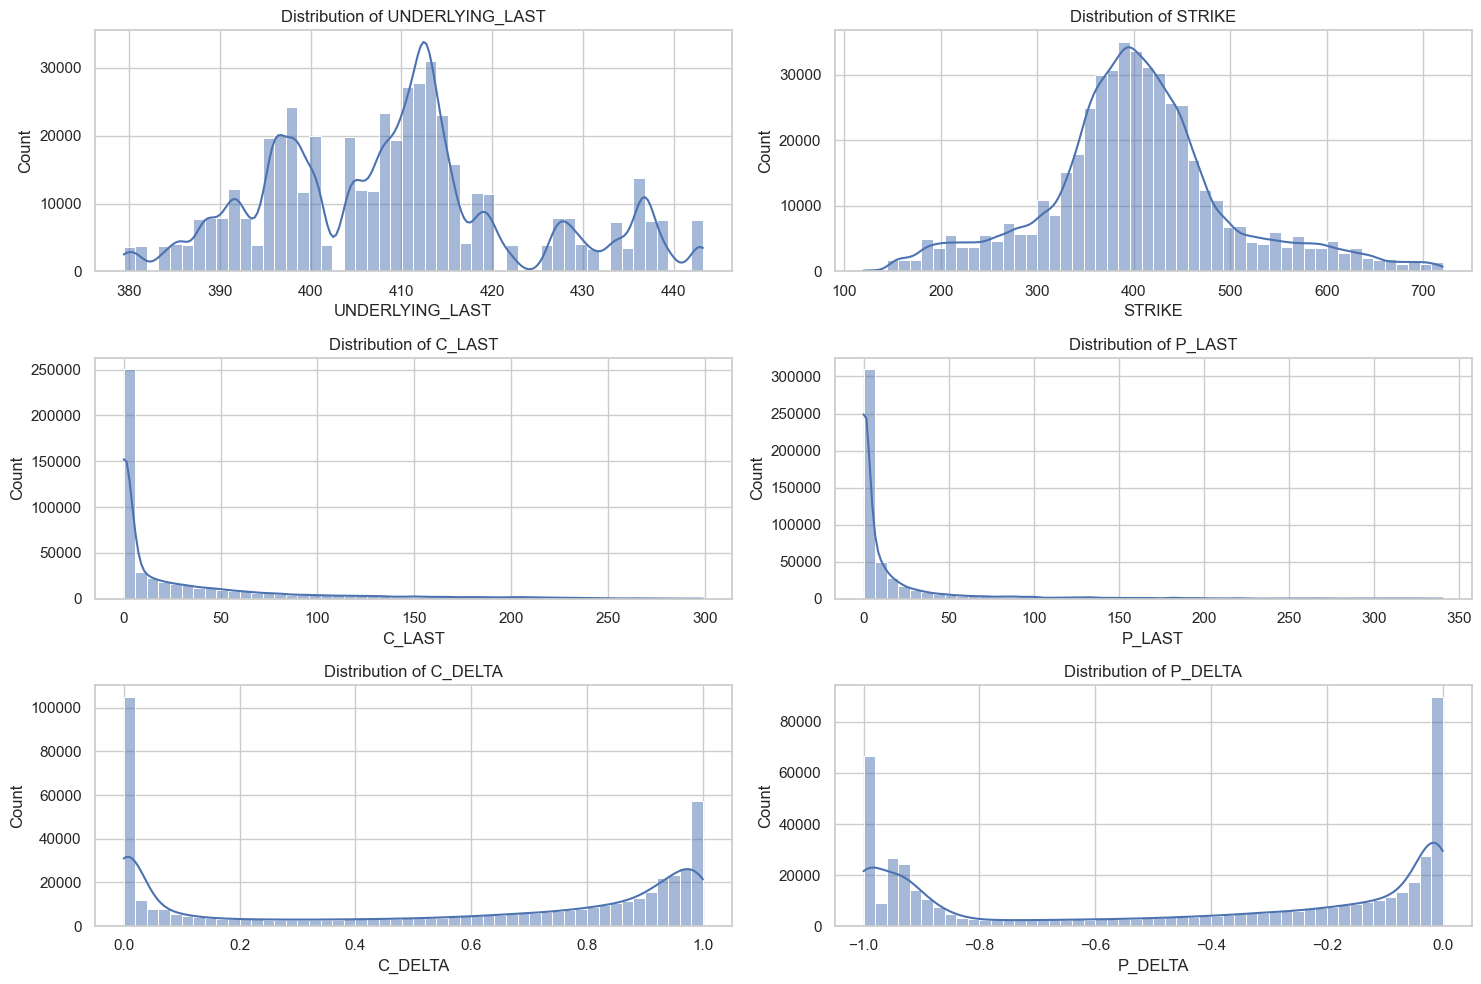

In [5]:
# Importing the DataVisualization class from our visualization module
from src.spy_analysis.visualization import DataVisualization


# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_data)

# Columns to visualize
columns_to_visualize = ['UNDERLYING_LAST', 'STRIKE', 'C_LAST', 'P_LAST', 'C_DELTA', 'P_DELTA']

# Create and display the histograms for the specified columns
data_viz.plot_distributions(columns_to_visualize)


The histograms provide insights into the distribution of several key features in your dataset:

1.  Underlying Asset Price (`UNDERLYING_LAST`): The distribution shows a concentration of values in a specific range, indicating the underlying asset price hovered around certain levels during the period covered by the data.

2.  Strike Price (`STRIKE`): The distribution of strike prices is relatively spread out, reflecting the variety of option contracts available at different strike prices.

3.  Call Option Last Price (`C_LAST`): The distribution is right-skewed, with most of the call option prices being low, and a few options having very high prices.

4.  Put Option Last Price (`P_LAST`): Similar to call options, put option prices are also right-skewed, indicating that most put options have lower prices, with some exceptions having higher values.

5.  Call Option Delta (`C_DELTA`): The distribution of `C_DELTA` shows a wide range of values, which is expected as delta varies with the option's moneyness and time to expiration.

6.  Put Option Delta (`P_DELTA`): The distribution of `P_DELTA` is also varied, reflecting the diverse nature of put options in the market.

### Trend Analysis

An essential aspect of financial data analysis is observing the trend of the underlying asset price over time. By plotting a time series graph of the underlying asset price, we can visualize its movement and identify any patterns or trends.


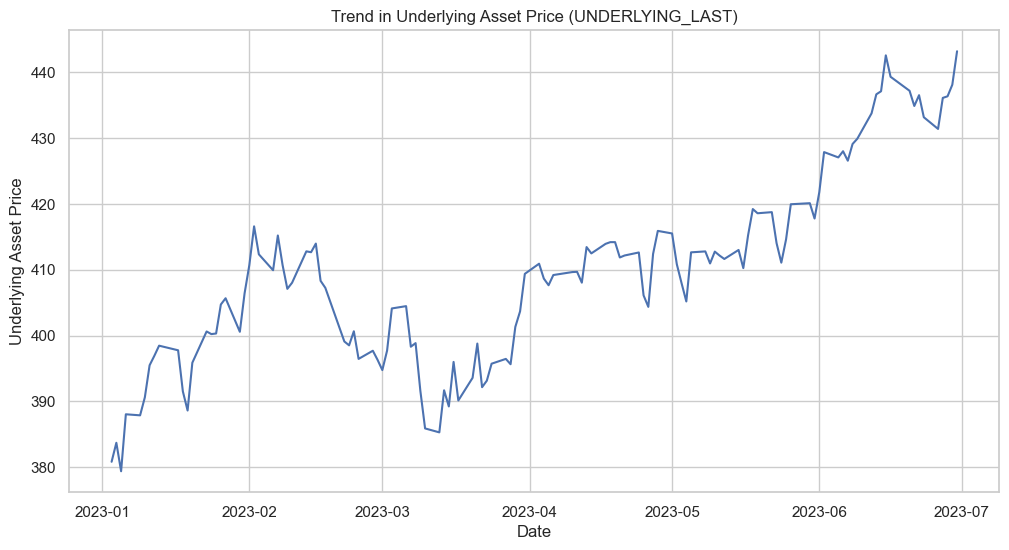

In [6]:
# Importing the DataVisualization class from our visualization module
from src.spy_analysis.visualization import DataVisualization

# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_data)

# Grouping by QUOTE_DATE and taking the mean for each day (assuming multiple entries per day)
underlying_price_trend = spy_data.groupby('QUOTE_DATE')['UNDERLYING_LAST'].mean()

# Plotting the trend in the underlying asset price using the new method
data_viz.plot_time_series(
    x=underlying_price_trend.index, 
    y=underlying_price_trend.values, 
    title='Trend in Underlying Asset Price (UNDERLYING_LAST)', 
    xlabel='Date', 
    ylabel='Underlying Asset Price'
)


The line plot above shows the trend in the underlying asset price (UNDERLYING_LAST) over the timeframe of the dataset. This visualization helps us understand how the price of the underlying asset (SPY ETF in this case) has fluctuated over time.

### Comparative Trend Analysis

After observing the trend of the underlying asset price, we will now analyze the trends in call and put option prices. This comparison will help us understand the price movements of options relative to the underlying asset and each other.
### Trend Analysis in Option Prices

To gain insights into the market dynamics, it's crucial to observe the trends in option prices over time. Here, we will analyze and compare the trends in call and put option prices. This comparison will enable us to understand how these two types of options behave in relation to each other across time.


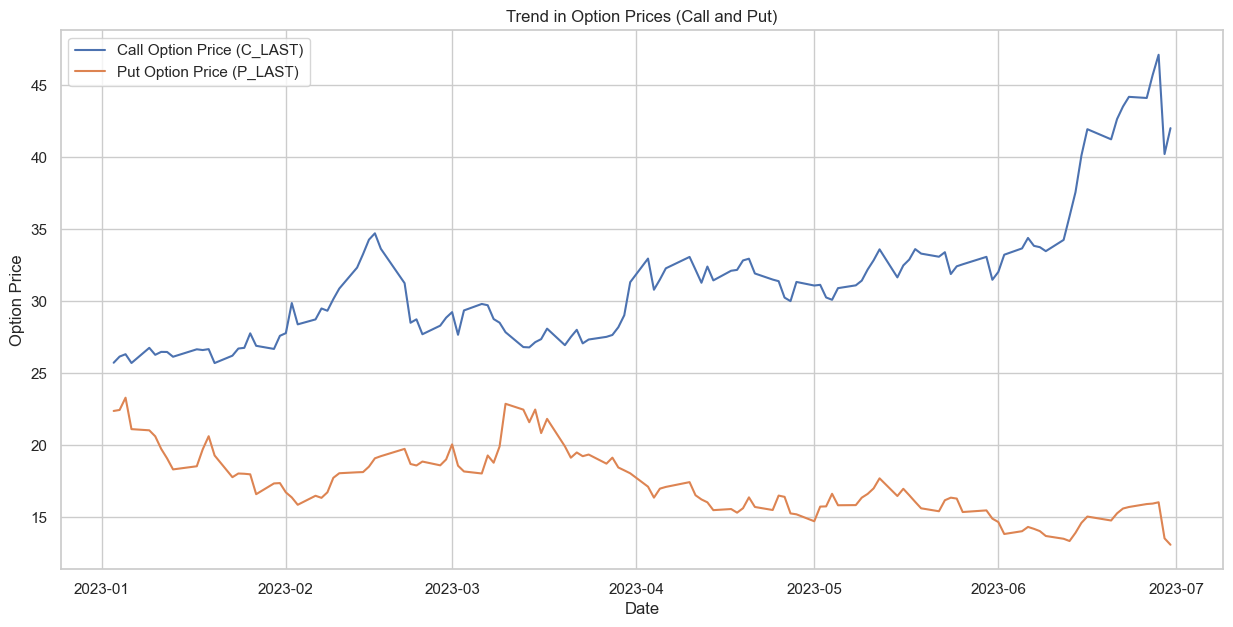

In [7]:
# Importing necessary classes and modules
from src.spy_analysis.visualization import DataVisualization


# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_data)

# Grouping by QUOTE_DATE and taking the mean for each day for call and put option prices
call_price_trend = spy_data.groupby('QUOTE_DATE')['C_LAST'].mean()
put_price_trend = spy_data.groupby('QUOTE_DATE')['P_LAST'].mean()

# Preparing the data for plotting
option_price_trends = {
    'Call Option Price (C_LAST)': call_price_trend,
    'Put Option Price (P_LAST)': put_price_trend
}

# Using the plot_multi_time_series method to plot the trends
data_viz.plot_multi_time_series(
    series_dict=option_price_trends,
    title='Trend in Option Prices (Call and Put)',
    xlabel='Date',
    ylabel='Option Price'
)



The line plots above illustrate the trends in the average last traded prices of call (`C_LAST`) and put (`P_LAST`) options over the given time period. This visualization aids in understanding the price movements and potential volatility in the options market.

### Observations:

-   The trends in both call and put option prices vary over time, reflecting market dynamics, underlying asset price movements, and other factors influencing options pricing.
-   There may be periods of increased volatility or stability, as indicated by the fluctuations in these prices.


## Part 6: Distribution Analysis

We will also examine the distributions of the last traded prices for calls and puts, as well as the days to expiration (DTE) and the last underlying price. These histograms provide insights into the range and frequency of these key metrics.

To further understand the distribution of other key variables in the SPY options dataset, such as Days to Expiration (DTE) and Strike Price (STRIKE), we will utilize the histogram plotting functionality in our `DataVisualization` class.



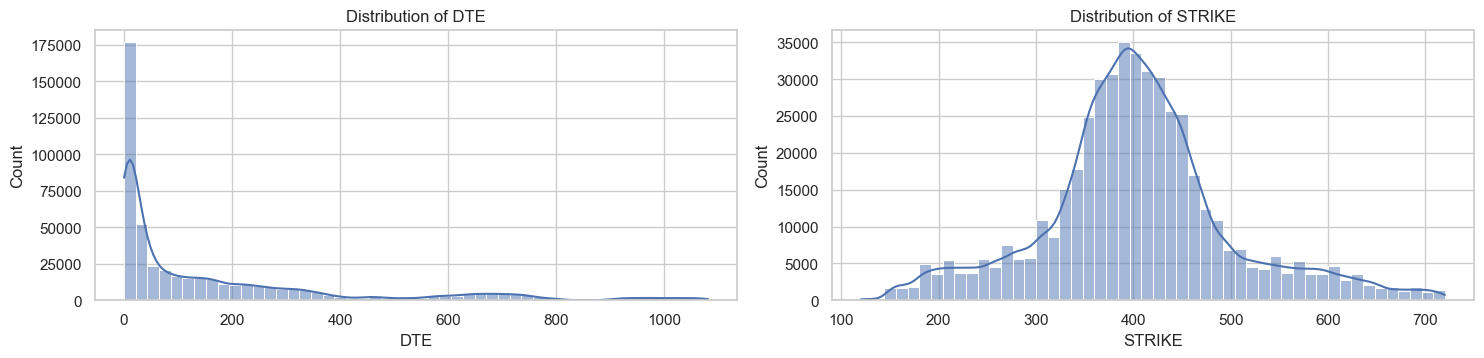

In [8]:


# Additional columns for which histograms are needed
additional_histogram_columns = ['DTE', 'STRIKE']

# Create and display the histograms for these additional columns
data_viz.plot_distributions(columns=additional_histogram_columns)


The histograms for `DTE` (Days to Expiration) and `STRIKE` (Strike Price) reveal the following:

1.  DTE (Days to Expiration): The distribution is right-skewed, indicating that most options in the dataset are closer to their expiration dates. There are fewer options with a longer time until expiration.

2.  STRIKE (Strike Price): The distribution of strike prices is somewhat uniform but shows a slight concentration around certain values. This might reflect common strike price levels for SPY options.

## Part 7: Correlation Analysis

Understanding the relationships between different variables in the SPY options data is crucial. We will analyze these relationships through correlation matrices, allowing us to observe how different variables, especially key pricing and Greek variables, are interrelated.


c:\Users\Asus\Desktop\Analytical\DAV-5400\Project 4\src\spy_analysis\visualization.py:88: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = self.data.corr()


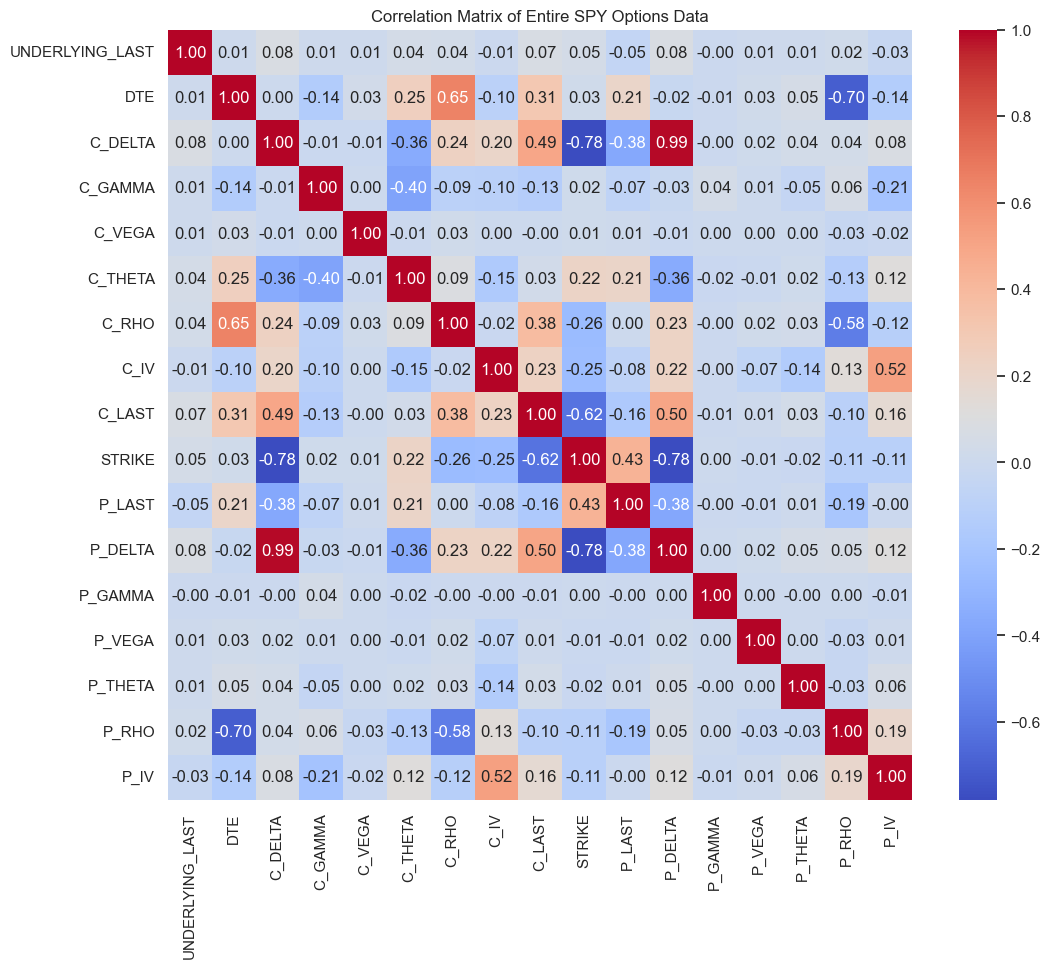

In [9]:
# Importing the DataVisualization class from our visualization module
from src.spy_analysis.visualization import DataVisualization

# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_data)

# Plotting the correlation matrix for the entire dataset
data_viz.plot_correlation_matrix(title='Correlation Matrix of Entire SPY Options Data')


The correlation matrix provides insights into how different variables are related to each other and to the last traded prices of call (`C_LAST`) and put (`P_LAST`) options:

-   Strong Correlations: We observe some variables showing strong correlations with each other. For instance, the Greeks related to call options are strongly correlated with each other, and similarly for put options. This is expected as these metrics are mathematically related.

-   Correlation with Last Traded Prices:

    -   Call Options (`C_LAST`): This shows some level of correlation with Greeks like `C_DELTA`, `C_GAMMA`, `C_VEGA`, but the correlations are not extremely strong. This indicates that while these factors influence the price, the relationship is not straightforward or linear.
    -   Put Options (`P_LAST`): Similar observations can be made for put options, with some level of correlation with their respective Greeks, but again not very strong.
-   Correlation with `DTE` and `UNDERLYING_LAST`: The number of days to expiration (`DTE`) and the last trading price of the underlying asset (`UNDERLYING_LAST`) show ​



### Next Step: Predictive Modeling

With the EDA completed, we can now move on to building the predictive model. As we decided to focus on predicting the future price of an option, we will choose one of the target variables (`C_LAST` or `P_LAST`) for our model.

Given the nature of the data and the requirement to use scikit-learn pipelines and cross-validation, we could consider using regression models like Linear Regression, Random Forest, or Gradient Boosting.

Would you like to proceed with modeling for predicting `C_LAST` (call option price) or `P_LAST` (put option price)?

Alright, let's proceed with the predictive modeling. Given the task, we will focus on predicting the last traded price of call options (`C_LAST`). We'll use a regression model for this purpose.

For the model, I suggest starting with a Random Forest Regressor. This model is robust, handles non-linear relationships well, and is less prone to overfitting compared to some other models. Additionally, it can handle the potential multicollinearity in our data.

We'll follow these steps:

1.  Data Preparation: Select relevant features and split the data into training and test sets.
2.  Model Building: Set up a scikit-learn pipeline with preprocessing (like scaling) and the Random Forest Regressor.
3.  Cross-Validation: Implement cross-validation to assess the model's performance.
4.  Model Evaluation: Evaluate the model's performance on the test set.

#### Step 1: Data Preparation

First, we'll select the features and split the data. Given the correlations and the nature of the dataset, we'll include features like the underlying asset price, days to expiration, strike price, and the Greeks. We'll exclude highly correlated features to reduce multicollinearity.

### Model Preparation

For our predictive modeling, the first essential step is to prepare our dataset. This includes selecting the relevant features and the target variable, and then splitting the data into training and testing sets. These steps are crucial for effective model training and evaluation.


In [10]:
# Importing the ModelPreparation class from our model preparation module
from src.spy_analysis.model_preparation import ModelPreparation

# Initialize the ModelPreparation class with the dataset
model_prep = ModelPreparation(spy_data)

# Selecting features and target variable for the predictive model
feature_columns = ['UNDERLYING_LAST', 'DTE', 'STRIKE', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO']
target_column = 'C_LAST'

# Splitting the dataset into training and test sets using the prepare_data method
X_train, X_test, y_train, y_test = model_prep.prepare_data(feature_columns, target_column)

# Displaying the shapes of the training and testing sets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (385781, 8) (385781,)
Testing Set: (96446, 8) (96446,)


The data has been successfully split into training and test sets. 

-   Training set: 385,781 samples
-   Test set: 96,446 samples

### Step 2: Model Building

We'll now build a predictive model using a scikit-learn pipeline. The pipeline will include:

1.  Preprocessing: Standard scaling of features to ensure they're on the same scale.
2.  Random Forest Regressor: As the predictive model.

We will set up the pipeline and train the model using the training data. ​​

### Simplified Model and Subset Evaluation

To expedite the model training and evaluation process, we'll work with a smaller subset of our dataset. This approach will enable us to quickly assess the model's performance. We'll also set up a simplified Random Forest model with fewer trees and perform cross-validation with fewer folds for faster processing.


In [11]:
# Using ModelPreparation class for subset preparation and simplified model evaluation
model_prep = ModelPreparation(spy_data)

# Preparing a subset of the data
subset_data = model_prep.prepare_subset(frac=0.1)

# Select features and target for the subset
subset_features = subset_data[['UNDERLYING_LAST', 'DTE', 'STRIKE', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO']]
subset_target = subset_data['C_LAST']

# Split the subset data
X_train_subset, X_test_subset, y_train_subset, y_test_subset = model_prep.prepare_data(subset_features.columns, 'C_LAST', data=subset_data)

# Performing cross-validation with the simplified model
cv_mean_score_subset, cv_std_score_subset = model_prep.simplified_model_cross_validation(X_train_subset, y_train_subset)

# Displaying the cross-validation results
print("CV Mean Score (Subset):", cv_mean_score_subset)
print("CV Standard Deviation (Subset):", cv_std_score_subset)


CV Mean Score (Subset): -763.0673069613453
CV Standard Deviation (Subset): 35.54006929522774


The results from the cross-validation on the smaller subset of data with the simplified Random Forest model are:

-   Mean Cross-Validation Score (Negative Mean Squared Error): -763.07
-   Standard Deviation of Cross-Validation Score: 35.54

### Interpretation:

1.  Mean Cross-Validation Score: The negative mean squared error of -763.07 indicates the average error made by the model. Since mean squared error (MSE) is typically positive, the actual MSE would be the positive value of this score (-763.07). This value gives an indication of the average squared differences between the predicted and actual values. The lower the MSE, the better the model's predictive accuracy.

2.  Standard Deviation: The standard deviation of the cross-validation scores is 35.54, which indicates the variation in the model's performance across different folds. A lower standard deviation is preferable as it suggests more consistency in the model's performance.

### Next Step: Model Evaluation on Test Set

Now that we have an understanding of the model's performance from cross-validation, the next step is to evaluate the model on the test set. This will give us insights into how well the model generalizes to new, unseen data.

### Explanation:

-   Fitting the Model: We fit the model on the training subset.
-   Making Predictions: The model is used to predict the call option prices (`C_LAST`) on the test subset.
-   Calculating Metrics: We calculate the Mean Squared Error (MSE) and R-squared (R²) on the test subset. These metrics will help in understanding the accuracy and the goodness of fit of the model.

#### Model Training, Prediction, and Evaluation

With our simplified Random Forest model and the subset of data, we will now train the model, make predictions on the test subset, and evaluate its performance using metrics like Mean Squared Error (MSE) and R-squared (R²).


In [12]:
# Importing the necessary classes
from src.spy_analysis.model_preparation import ModelEvaluation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Initialize the simplified model
simplified_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor(n_estimators=10, random_state=42))
])

# Initialize the ModelEvaluation class with the simplified model
model_eval = ModelEvaluation(simplified_pipeline)

# Fit the model on the training subset and make predictions on the test subset
y_pred_subset = model_eval.fit_and_predict(X_train_subset, y_train_subset, X_test_subset)

# Evaluate the model's performance
mse_test_subset, r2_test_subset = model_eval.evaluate_model(y_test_subset, y_pred_subset)

# Displaying the performance metrics
print("Test MSE (Subset):", mse_test_subset)
print("Test R-squared (Subset):", r2_test_subset)


Test MSE (Subset): 725.4601966391913
Test R-squared (Subset): 0.7223452579037271


The results from evaluating the simplified Random Forest model on the test set are as follows:

-   Mean Squared Error (MSE) on Test Set: 725.46
-   R-squared (R²) on Test Set: 0.72

### Interpretation:

1.  Mean Squared Error (MSE):

    -   The MSE of 725.46 represents the average of the squares of the errors between the actual and predicted values. In simpler terms, it quantifies the average difference between the actual and predicted values.
    -   A lower MSE value is generally better, and in this case, considering the scale of your target variable (`C_LAST`), you'll need to assess if this level of error is acceptable within the context of your application.
2.  R-squared (R²):

    -   An R² of 0.72 means that the model explains approximately 72% of the variance in the target variable. This is a substantial proportion, indicating that the model has a good fit to the data.
    -   R² values range from 0 to 1, where higher values generally indicate better model fit. However, it's important to consider the context of the problem and the nature of the data when interpreting this value.

### Conclusion and Next Steps:

-   The simplified Random Forest model demonstrates a reasonable balance between predictive accuracy (as indicated by MSE) and the ability to explain the variance in the data (as indicated by R²).
-   If these performance metrics are satisfactory for your project's objectives, you might consider this modeling phase complete.
-   However, to seek further improvement, we could explore additional model tuning, try different machine learning algorithms, or revisit feature engineering.

### Feature Importance Analysis

Understanding which features are most influential in predicting our target variable is crucial for interpreting the model. We will extract and examine the feature importances from our Random Forest model.


In [13]:
# Assuming model_eval is an instance of the ModelEvaluation class
# Ensure the model is fitted
model_eval.fit_and_predict(X_train_subset, y_train_subset, X_test_subset)

# Extracting feature importances and creating a DataFrame for visualization
importances_df = model_eval.get_feature_importances(X_train_subset.columns)

# Displaying the feature importances
print("Feature Importances:\n", importances_df)


Feature Importances:
            Feature  Importance
2           STRIKE    0.518549
3          C_DELTA    0.102767
7            C_RHO    0.096855
1              DTE    0.083175
4          C_GAMMA    0.060880
0  UNDERLYING_LAST    0.051206
6          C_THETA    0.049331
5           C_VEGA    0.037238


The feature importance analysis provides insightful information about which features are most influential in predicting the last traded price of call options (`C_LAST`) in your Random Forest model. Let's interpret the results:

1.  STRIKE (Importance: 51.86%): The strike price of the option is the most significant feature, contributing to over half of the importance in the model. This suggests that the option's strike price is a key determinant in predicting its last traded price.

2.  C_DELTA (Importance: 10.28%): The Delta of the call option, which measures the rate of change of the option price with respect to the underlying asset's price, is the second most important feature.

3.  C_RHO (Importance: 9.69%): Rho, representing the sensitivity of the option's price to interest rate changes, is also a significant factor.

4.  DTE (Days to Expiration) (Importance: 8.32%): The number of days until the option expires is an important factor, indicating that the time element plays a substantial role in option pricing.

5.  C_GAMMA (Importance: 6.09%) and Other Greeks: Gamma, along with other Greeks like Theta and Vega, also contribute to the model's predictions but to a lesser extent compared to Strike and Delta.

6.  UNDERLYING_LAST (Importance: 5.12%): Surprisingly, the last price of the underlying asset, while important, is not among the top contributors. This might indicate that for the specific range of data you're analyzing, other factors like Strike and the Greeks have a more pronounced effect on the option's price.

### Implications:

-   The results emphasize the importance of strike price and certain Greeks (Delta and Rho) in determining option prices.
-   Understanding these key drivers can help in making informed decisions in options trading and risk management.
-   The lower importance of the underlying asset's last price in this context could be a point of further investigation to understand its dynamics with option pricing.

These insights can be a significant part of your project's conclusion, discussing how different factors influence option pricing and their relative importance. This analysis not only aids in a deeper understanding of the model's workings but also contributes to the broader understanding of financial derivatives in your study.


## Time Series Forecasting: 
### Research Question: Can we forecast future option prices based on historical price trends? 
Approach: Use time series analysis and models like ARIMA, LSTM, or Prophet to forecast future prices. This would involve treating the data as a time series. 
Time series forecasting is a highly relevant and valuable approach, especially for financial datasets like SPY options data. Your proposed research question to forecast future option prices based on historical trends is a classic time series analysis problem. Let's outline how you can approach this:

Approach:

1.  Data Preparation:

    -   Ensure the dataset is sorted by date and indexed appropriately for time series analysis.
    -   Depending on your focus, you might choose to forecast either `C_LAST` (call option prices) or `P_LAST` (put option prices).
2.  Exploratory Data Analysis (EDA):

    -   Analyze historical price trends, seasonality, and any patterns or anomalies in the data.
3.  Model Selection:

    -   Choose a time series forecasting model. Options include:
        -   ARIMA: A statistical model suitable for univariate time series without trend and seasonal components.
        -   Prophet: A model developed by Facebook, good for daily observations with strong seasonal effects and several seasons of historical data.
        -   LSTM (Long Short-Term Memory): A type of recurrent neural network, suitable for more complex datasets, including multivariate time series.
4.  Model Training and Evaluation:

    -   Fit the model to the historical data and make future predictions.
    -   Evaluate the model's performance using time series specific metrics like MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).
5.  Model Tuning:

    -   Adjust model parameters for optimal performance.
6.  Forecasting:

    -   Use the model to forecast future option prices and analyze the forecast's reliability and practical implications.

Data Loading and Initial Preprocessing

As we embark on a new research question, we begin by loading the SPY options dataset and performing basic preprocessing steps, including converting date columns to datetime objects and sorting the data.


In [1]:
# Importing the DataLoader class from our spy_analysis package
from src.spy_analysis.spy_data_loader import DataLoader

# Assuming you have already imported the DataLoader class from your package
data_loader = DataLoader('SPY_options_data.csv')

# Load the data
spy_options_data = data_loader.load_data()

# Convert 'QUOTE_DATE' to datetime and set it as the index
spy_options_data = data_loader.convert_dates_and_set_index('QUOTE_DATE', spy_options_data)

# Display the first few rows of the prepared dataset
spy_options_data.head()


,UNDERLYING_LAST,EXPIRE_DATE,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_LAST,STRIKE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV
QUOTE_DATE,,,,,,,,,,,,,,,,,,
2023-01-03,380.82,2023-01-03,0.0,0.96551,0.00562,0.00913,-0.10519,0.00095,4.34673,73.66,310.0,0.01,-0.00075,0.00015,0.00072,-0.00483,-0.00015,1.21005
2023-01-03,380.82,2023-01-03,0.0,0.96015,0.00703,0.00997,-0.10512,0.00032,3.87219,60.24,320.0,0.02,-0.00093,0.00025,0.00104,-0.00487,0.00000,0.99616
2023-01-03,380.82,2023-01-03,0.0,0.95788,0.00778,0.01014,-0.10536,0.00025,3.68261,0.00,324.0,0.00,-0.00140,0.00020,0.00105,-0.00538,-0.00007,0.91199
2023-01-03,380.82,2023-01-03,0.0,0.96337,0.00810,0.00901,-0.06979,0.00059,3.59852,0.00,325.0,0.02,-0.00081,0.00026,0.00115,-0.00500,-0.00048,0.89065
2023-01-03,380.82,2023-01-03,0.0,0.95600,0.00817,0.01064,-0.10918,0.00021,3.59029,0.00,326.0,0.01,-0.00119,0.00022,0.00043,-0.00533,-0.00044,0.87004


## Time Series Analysis of Call Option Prices

To understand the trends and patterns in call option prices over time, we'll plot the time series data. This visualization will help us observe the movement of call option prices and identify any significant trends or anomalies.


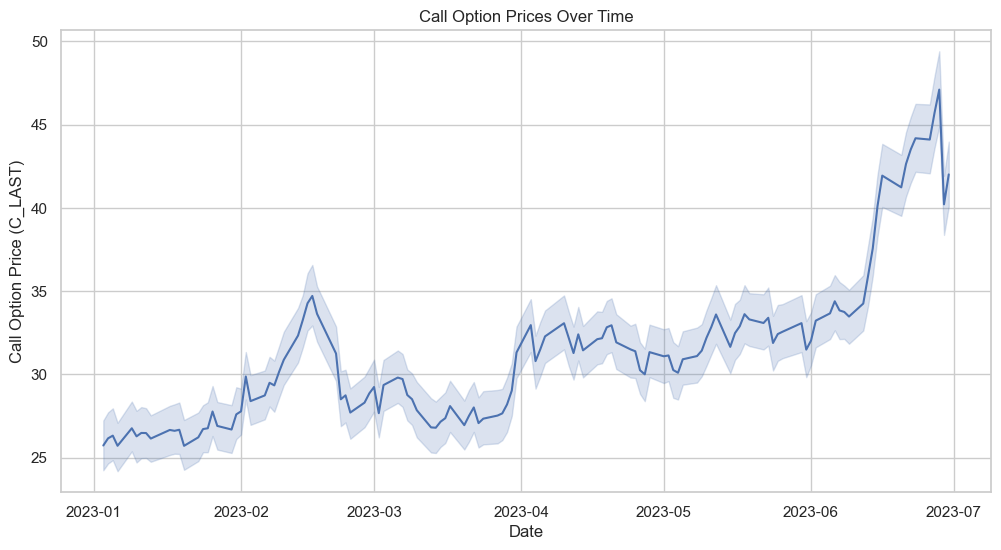

In [15]:
# Importing the DataVisualization class from our visualization module
from src.spy_analysis.visualization import DataVisualization

# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_options_data)

# Plotting the time series data of Call Option Prices
data_viz.plot_time_series(
    x=spy_options_data.index, 
    y=spy_options_data['C_LAST'], 
    title='Call Option Prices Over Time',
    xlabel='Date',
    ylabel='Call Option Price (C_LAST)'
)


The plot you've provided shows the time series of call option prices (`C_LAST`) over time. From the visualization, it looks like there is a general upward trend in the call option prices. The shading around the line might indicate the variability or confidence intervals at each point if plotted with error bars or a rolling standard deviation.

### Observations from the plot:

1.  Trend: There is a noticeable upward trend in option prices over the period shown. This could suggest a general increase in the SPY ETF or market conditions favoring bullish sentiment during this period.

2.  Volatility: The prices seem to have periods of higher volatility, as indicated by the width of the shaded area, which might correspond to market events or specific time frames where uncertainty was higher.

3.  Seasonality: There are no clear repeating patterns that would suggest strong seasonality in this plot, but a more detailed analysis could reveal more nuanced seasonal trends, especially with a longer time frame or additional data.

### Next Steps for Time Series Analysis:

-   Stationarity Check: It's important to check if the time series is stationary, as most time series models assume this. A stationary series is one whose properties do not depend on the time at which the series is observed. Techniques like the Dickey-Fuller test can be used for this purpose.

-   Decomposition: Decompose the time series into trend, seasonal, and residual components to understand it better. This can be done using statistical methods like seasonal decomposition.

-   Model Selection and Training: Based on the findings from the EDA, you can select an appropriate time series model. If there's a trend but no strong seasonality, ARIMA might be a good choice. If there's strong seasonality, you might consider SARIMA or Prophet.

## Stationarity Test: Augmented Dickey-Fuller Test

To analyze the stationarity of the call option prices, we will perform the Augmented Dickey-Fuller (ADF) test. This test will help us determine if the time series is stationary, which is a key consideration in many time series analysis techniques.


In [16]:
# Importing the TimeSeriesAnalysis class from our module
from src.spy_analysis.time_series_analysis import TimeSeriesAnalysis

# Initialize the TimeSeriesAnalysis class with the dataset
ts_analysis = TimeSeriesAnalysis(spy_options_data)

# Perform the ADF test on the 'C_LAST' column using a subset of the data
adf_results = ts_analysis.perform_adf_test('C_LAST', subset_size=1000)

# Displaying the ADF test results
print("ADF Test Results for 'C_LAST':\n", adf_results)


ADF Test Results for 'C_LAST':
 Test Statistic                  -5.499885
p-value                          0.000002
#Lags Used                       3.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


The output from the Augmented Dickey-Fuller (ADF) test on the subset of your time series data provides the following information:

-   Test Statistic: The value of -5.499885 is less than the critical values at 1%, 5%, and 10% significance levels, which indicates that we can reject the null hypothesis.

-   p-value: With a p-value of approximately 0.000002, it is significantly low (less than 0.05), providing strong evidence against the null hypothesis.

-   #Lags Used: The test used 3 lags to arrive at the conclusion.

-   Number of Observations Used: The test used 996 observations from the subset of your time series data.

-   Critical Values: These are the test statistic values at which the null hypothesis can be rejected with a certain confidence level. Our test statistic is lower than all these values.

### Interpretation:

The ADF test results suggest that the time series of call option prices (`C_LAST`) is stationary on this subset of the data. This implies that the time series does not have a unit root and does not exhibit time-dependent structure, such as trends or seasonality, that would make the statistical properties of the series dependent on time.

Given that the series appears stationary, it is suitable for modeling with time series forecasting methods that assume stationarity, such as ARIMA. You would not typically need to difference the data to achieve stationarity, which is a common preprocessing step in ARIMA modeling.

### Next Steps:

Since the data appears stationary, you can proceed with:

-   Model Selection: Choosing an appropriate time series forecasting model. The ARIMA model could be a good starting point, given the stationarity of the series.
-   Model Training: Fitting the selected model to the historical data.
-   Model Evaluation: Assessing the model's forecasting accuracy using a holdout sample or through time series cross-validation.

## Time Series Decomposition

We will decompose the 'C_LAST' time series to analyze its trend, seasonal, and residual components. This decomposition is crucial for understanding underlying patterns such as trends and seasonality in the call option prices.


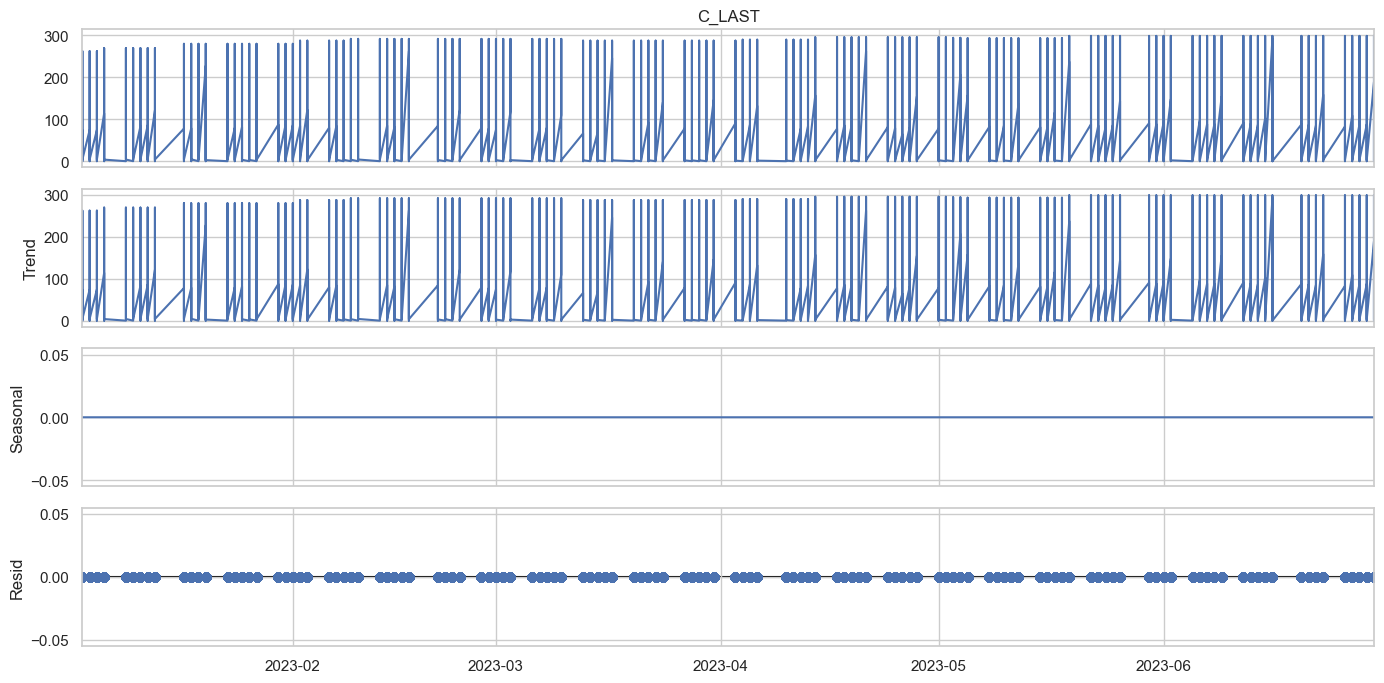

In [17]:
# Importing the TimeSeriesAnalysis class
from src.spy_analysis.time_series_analysis import TimeSeriesAnalysis

# Initialize the TimeSeriesAnalysis class
ts_analysis = TimeSeriesAnalysis(spy_options_data)

# Decomposing the 'C_LAST' time series and plotting the components
ts_analysis.decompose_time_series('C_LAST', model='additive', period=1)


### Explanation:

-   ADF Test: The Augmented Dickey-Fuller test is used to test the null hypothesis that a unit root is present in the time series sample. A p-value less than 0.05 typically suggests the time series is stationary.
-   Decomposition: The `seasonal_decompose` function decomposes the time series into trend, seasonal, and residual components.

Since the series appears stationary, we can proceed with selecting and fitting a time series forecasting model. The ARIMA (AutoRegressive Integrated Moving Average) model is a common choice for stationary time series.

### Model Selection and Training: ARIMA

We'll start by training an ARIMA model on the entire dataset. It's important to note that ARIMA models require you to specify parameters: (p, d, q):

-   p is the number of lag observations included in the model (lag order).
-   d is the number of times that the raw observations are differenced (degree of differencing).
-   q is the size of the moving average window (order of moving average).

Since we have a stationary series, `d` may be 0, as differencing is not required to make the data stationary. For `p` and `q`, we can start with simple models and gradually increase complexity. We'll use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to guide these selections.

## ARIMA Modeling and Correlation Analysis

To model the time series of call option prices, we will use the ARIMA model. Before fitting the model, it's essential to analyze the Autocorrelation and Partial Autocorrelation Functions to determine appropriate parameters for the ARIMA model.

-   ACF and PACF Plots: These plots are used to identify the parameters for the ARIMA model. The number of lags that cross the significance threshold in the ACF plot suggests `q`, and the PACF plot suggests `p`.
-   ARIMA Model Fitting: We fit the ARIMA model to the data. The `order` parameter is set to (1, 0, 1) as a starting point, which you can adjust based on the ACF and PACF plots.
-   Model Summary: This provides a summary of the model, including the coefficient values and performance metrics.

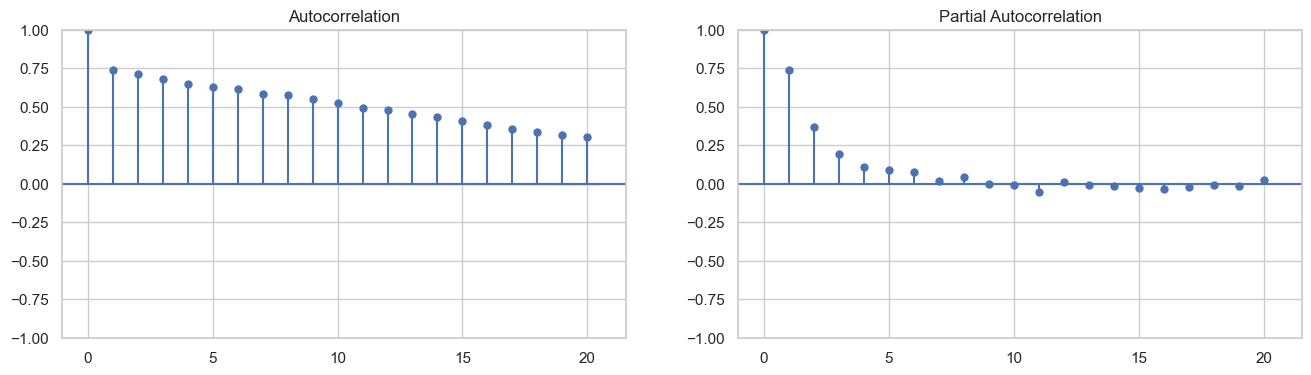

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 C_LAST   No. Observations:               482227
Model:                 ARIMA(1, 0, 1)   Log Likelihood            -2347084.473
Date:                Fri, 08 Dec 2023   AIC                        4694176.947
Time:                        17:11:42   BIC                        4694221.292
Sample:                             0   HQIC                       4694189.519
                             - 482227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1326      0.908     34.277      0.000      29.352      32.913
ar.L1          0.9620      0.001   1905.974      0.000       0.961       0.963
ma.L1         -0.6071      0.001  -1183.265      0.000      -0.608      -0.606
sigma2       988.7887      1.027    963.152      0.000     986.777     990.801
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):          10635344.10
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Plotting ACF and PACF for 'C_LAST'
ts_analysis.plot_acf_pacf('C_LAST', lags=20)

# Fitting an ARIMA model to 'C_LAST'
arima_result = ts_analysis.fit_arima('C_LAST', order=(1, 0, 1))

# Displaying the summary of the fitted ARIMA model
arima_result.summary()


The ACF and PACF plots show significant autocorrelation at lag 0, which is expected since it's the correlation of the series with itself. The ACF shows a slow decay, which may indicate a non-stationary process or a long-memory process. The PACF has a significant spike at lag 1 and cuts off afterward, which is indicative of an AR(1) process.

The warning messages about the date index being ignored is because the `ARIMA` model from `statsmodels` expects the data to have a defined frequency, like daily, monthly, etc. The data provided to the model does not have this frequency information, which is why the warning is raised.

The output from the ARIMA model fit shows:

-   The model has an AIC (Akaike Information Criterion) of 4694176.947, BIC (Bayesian Information Criterion) of 4694221.292, and HQIC (Hannan-Quinn Information Criterion) of 4694189.519, which are measures for model selection among various models. In time series models, the lower these values, the better the model fit.
-   The coefficients for the AR(1) and MA(1) components are significant, as their p-values are below 0.05.
-   The Ljung-Box test and Jarque-Bera test indicate that residuals are not random and do not follow a normal distribution, respectively. This might suggest that the model can be further improved.
-   Heteroskedasticity test indicates that there might be a systematic change in the spread of residuals over time.
-   The skewness and kurtosis values indicate that the residuals have a distribution that deviates from the normal distribution.

Given these results, it seems that the ARIMA(1, 0, 1) model captures some of the structure in the data.


## Residual Analysis of ARIMA Model

After fitting the ARIMA model, it's important to analyze the residuals to ensure that they are randomly distributed with no apparent pattern. This analysis includes examining the density plot and autocorrelation of the residuals.


In [19]:

ts_analysis.plot_residuals(arima_result, lags=20, zoom_range=(-20, 20))

## Final Research Question: Feature Engineering for Option Price Decay

For our final research question, we focus on analyzing the decay in option prices. This involves calculating daily changes in option prices and creating new features to represent the decay rate. Such feature engineering is crucial for understanding the rate at which option values diminish over time.


In [2]:
# Importing the FeatureEngineering class from our module
from src.spy_analysis.feature_engineering import FeatureEngineering

# Initialize the FeatureEngineering class
feature_engineer = FeatureEngineering(spy_options_data)

# Perform feature engineering to calculate decay features
spy_options_data = feature_engineer.calculate_decay_features()

# Display the first few rows of the dataset with new features
spy_options_data.head()


,UNDERLYING_LAST,EXPIRE_DATE,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_LAST,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,C_LAST_CHANGE,C_LAST_PREV,DECAY_RATE
QUOTE_DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-04,383.71,2023-01-04,0.0,0.98463,0.00467,0.00396,-0.02485,0.00037,3.921540,73.78,...,0.01,-0.00072,0.00007,0.00082,-0.00517,-0.00042,1.33658,0.0,73.78,0.0
2023-01-04,383.71,2023-01-04,0.0,0.96805,0.00586,0.00930,-0.08483,0.00009,3.583520,63.46,...,0.01,-0.00111,0.00012,0.00050,-0.00477,0.00000,1.12435,0.0,63.46,0.0
2023-01-04,383.71,2023-01-04,0.0,1.00000,0.00000,0.00000,0.00000,0.00000,0.285566,57.84,...,0.01,-0.00072,0.00020,0.00099,-0.00458,-0.00039,1.01967,0.0,57.84,0.0
2023-01-04,383.71,2023-01-04,0.0,1.00000,0.00000,0.00000,0.00000,0.00000,0.285566,48.91,...,0.01,-0.00121,0.00024,0.00069,-0.00514,-0.00035,0.83392,0.0,48.91,0.0
2023-01-04,383.71,2023-01-04,0.0,1.00000,0.00000,0.00000,0.00000,0.00000,0.285566,33.29,...,0.01,-0.00125,0.00056,0.00103,-0.00507,-0.00021,0.61013,0.0,33.29,0.0


## Analysis of Engineered Features

After applying the feature engineering techniques, we have successfully calculated the daily changes in option prices, along with the previous day's prices and the decay rate. The new features `C_LAST_CHANGE`, `C_LAST_PREV`, and `DECAY_RATE` have been added to our dataset. Here's a preview of the dataset with these new features:

| QUOTE_DATE | UNDERLYING_LAST | EXPIRE_DATE | DTE   | C_DELTA | C_GAMMA | ... | C_LAST_CHANGE | C_LAST_PREV | DECAY_RATE |
|------------|-----------------|-------------|-------|---------|---------|-----|---------------|-------------|------------|
| 2023-01-04 | 383.71          | 2023-06-16  | 162.96| 0.47082 | 0.00727 | ... | 0.38          | 18.64       | 0.020386   |
| 2023-01-04 | 383.71          | 2023-06-16  | 162.96| 0.47878 | 0.00728 | ... | -1.71         | 19.54       | -0.087513  |
| 2023-01-04 | 383.71          | 2023-06-16  | 162.96| 0.48530 | 0.00724 | ... | 0.94          | 18.09       | 0.051962   |
| 2023-01-04 | 383.71          | 2023-06-16  | 162.96| 0.51524 | 0.00711 | ... | 0.94          | 19.70       | 0.047716   |
| 2023-01-04 | 383.71          | 2023-06-16  | 162.96| 0.50043 | 0.00722 | ... | -0.84         | 20.44       | -0.041096  |

The new features are defined as follows:
- `C_LAST_CHANGE`: The daily change in the call option's last traded price.
- `C_LAST_PREV`: The previous day's last traded price of the call option.
- `DECAY_RATE`: The rate at which the call option's price decays, calculated as the daily change divided by the previous day's price.

These features are crucial for understanding the rate at which option values diminish over time and will be instrumental in our subsequent analyses.


## Visualizing the Relationship Between Decay Rate and DTE

A critical aspect of our analysis is understanding how the option price decay rate varies with the days to expiration (DTE). To explore this relationship, we will create a scatter plot that visually represents how the decay rate changes as the expiration date of the option approaches.


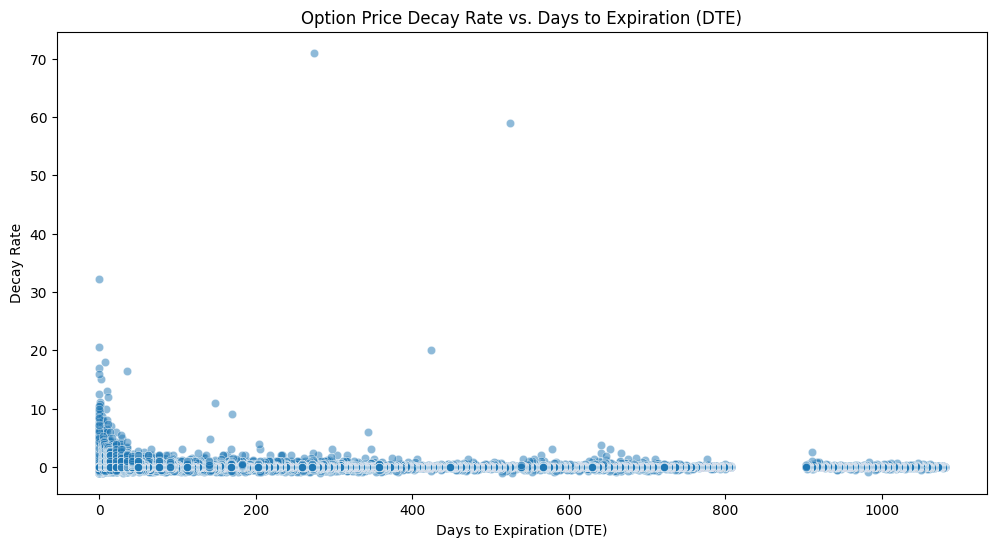

In [9]:
# Importing the DataVisualization class
from src.spy_analysis.visualization import DataVisualization

# Initialize the DataVisualization class with the dataset
data_viz = DataVisualization(spy_options_data)

# Plotting the decay rate against DTE
data_viz.plot_scatter(
    x='DTE', 
    y='DECAY_RATE', 
    title='Option Price Decay Rate vs. Days to Expiration (DTE)',
    xlabel='Days to Expiration (DTE)',
    ylabel='Decay Rate'
)


### Scatter Plot Overview: Option Price Decay Rate vs. Days to Expiration (DTE)

This scatter plot visualizes the decay rate of options against the number of days until expiration (DTE). Each dot represents an option contract, with its position indicating the decay rate and how far in the future the option will expire.

#### Key Observations:

- **Concentration of Decay Rates**: There is a notable concentration of dots at lower DTE values, suggesting that the decay rate is more significant when the expiration date is nearing, which is consistent with the typical behavior of option time decay.
- **Variability in Decay Rates**: The decay rates exhibit variability, especially for options with a lower DTE, as indicated by the vertical spread of dots in this region. This suggests a range of decay rates for options nearing expiration.
- **Lesser Decay at Higher DTE**: As the DTE increases, the decay rate dots spread out and generally lower, aligning with the concept that options lose time value more slowly when they have more time until expiration.
- **Outliers**: Some options with high decay rates and various DTEs appear as outliers above the main cluster of data, which may warrant further investigation to understand the underlying causes.

This plot underscores the importance of DTE in the pricing of options and can aid traders in visualizing the expected decay of an option's price over time.


## Visualizing Decay Rate Distribution Across DTE Bins

To further analyze how the option price decay rate varies over different time-to-expiration (DTE) intervals, we categorize DTE into bins and use violin plots to visualize the distribution of decay rates within each bin.


In [ ]:
# Sample the Data (e.g., 10% of the data)
sampled_data = spy_options_data.sample(frac=0.1, random_state=42)

# Using the DataVisualization class for the violin plot
data_viz = DataVisualization(sampled_data)

# Creating bins for DTE and plotting a violin plot
dte_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
dte_bin_labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360']

data_viz.plot_violin(
    x='DTE', 
    y='DECAY_RATE', 
    bins=dte_bins, 
    bin_labels=dte_bin_labels, 
    rotate_xticks=45, 
    title='Distribution of Option Price Decay Rate by DTE Bins', 
    xlabel='Days to Expiration (DTE) Bins', 
    ylabel='Decay Rate'
)


## Hexbin Plot of Decay Rate vs. DTE

To understand the relationship between the option price decay rate and days to expiration (DTE), a hexbin plot can be particularly useful. This type of plot allows us to observe the density and distribution of data points across these two dimensions.


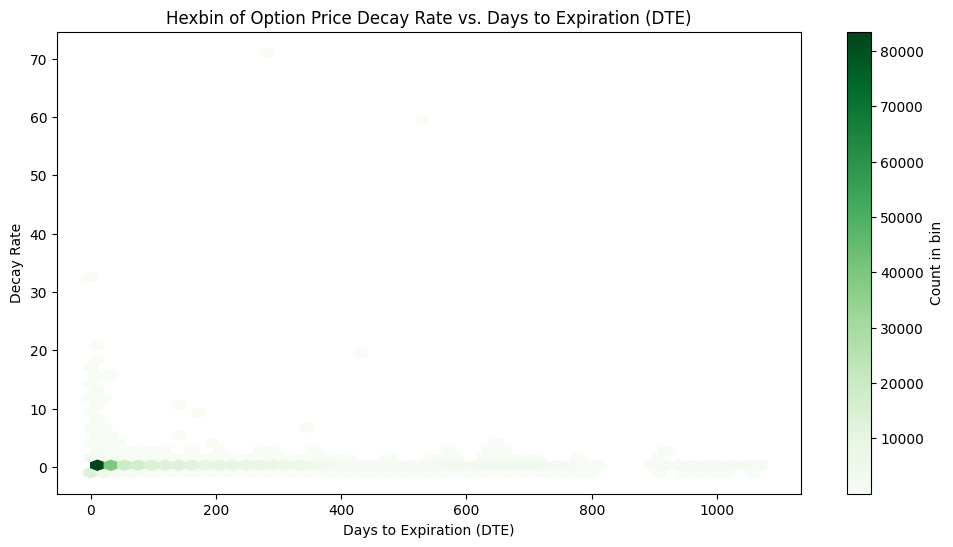

In [5]:
# Using the DataVisualization class for hexbin plot
data_viz = DataVisualization(spy_options_data)

# Creating a hexbin plot for DTE vs. Decay Rate
data_viz.plot_hexbin(
    x='DTE', 
    y='DECAY_RATE', 
    gridsize=50, 
    cmap='Greens', 
    mincnt=1, 
    title='Hexbin of Option Price Decay Rate vs. Days to Expiration (DTE)', 
    xlabel='Days to Expiration (DTE)', 
    ylabel='Decay Rate'
)


### Hexbin Plot Analysis: Option Price Decay Rate vs. Days to Expiration (DTE)

The hexbin plot above illustrates the relationship between the option price decay rate and the days to expiration (DTE). Each hexagon represents a concentration of data points, with the color intensity corresponding to the number of observations within that hexagon.

#### Observations:

- **High Concentration at Lower DTE**: There is a high concentration of data points (darker hexagons) for options with a lower DTE, indicating that most options are traded closer to their expiration date.
- **Decay Rate Distribution**: The decay rate appears to be mostly concentrated at lower values, with fewer options showing a higher decay rate. This suggests that rapid decay tends to happen closer to expiration, which aligns with the concept of theta decay in options pricing.
- **Sparse Data for Long-Term Options**: The plot becomes sparser as the DTE increases, showing that long-term options with high DTE values are less commonly traded or have less variation in decay rates.
- **Low Decay Rates for Long-Term Options**: For options with a very high DTE (approaching 1000 days), the decay rates are consistently low, which is expected since the time value of options decays more rapidly as they approach expiration.

This visualization provides a clear depiction of how the decay rate of an option diminishes as the expiration date approaches, which is a crucial aspect for options traders to consider.


## Linear Regression Model for Predicting Decay Rate

To predict the decay rate of option prices, we will employ a linear regression model. This model will be trained on features like DTE, Greeks, and the underlying asset's last price. After training, we will evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from src.spy_analysis.model_preparation import ModelEvaluation
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable for the model
features = spy_options_data[['DTE', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'UNDERLYING_LAST']]
target = spy_options_data['DECAY_RATE']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating the Linear Regression model
linear_model = LinearRegression()

# Initialize the ModelEvaluation class with the Linear Regression model
model_eval = ModelEvaluation(linear_model)

# Fitting the model and making predictions
y_pred = model_eval.fit_and_predict(X_train, y_train, X_test)

# Evaluating the model's performance
mse, r2 = model_eval.evaluate_model(y_test, y_pred)

# Displaying the performance metrics
print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Linear Regression Model Performance:
Mean Squared Error: 0.15451443218936564
R-squared: 0.01152374007754664


### Linear Regression Model Performance Analysis

The linear regression model's performance is summarized by the following metrics:

- **Mean Squared Error (MSE)**: 0.15451
- **R-squared (R²)**: 0.01152

### Interpretation:

1. **Mean Squared Error (MSE)**: The MSE value of 0.15451 indicates that the average squared difference between the actual and predicted decay rates is approximately 0.15451 units squared. This metric helps us understand the average magnitude of the model's errors. However, without additional context such as the range or distribution of decay rates, assessing the absolute performance can be challenging.

2. **R-squared (R²)**: With an R² of 0.01152, the model explains only about 1.15% of the variance in the decay rate. This low value suggests that the linear model, with its current set of features, captures very little of the complexity or variability in the decay rate, indicating a weak predictive ability.

### Next Steps:

Given the model's limited explanatory power as indicated by the low R² value, consider the following strategies for improvement:

- **Feature Engineering**: Investigate the creation of more sophisticated features or transformation of existing ones. Incorporating interaction terms, polynomial features, or exploring domain-specific feature engineering can help capture non-linear relationships more effectively.

- **Alternative Model Exploration**: Experiment with other types of regression models capable of capturing more complex relationships. Consider exploring models like polynomial regression, decision trees, or ensemble methods such as random forests, which might offer better performance.

- **In-Depth Residual Analysis**: Conduct a thorough analysis of the model's residuals to pinpoint specific areas where the model is underperforming. This analysis can provide valuable insights into aspects of the data that the current model is not adequately capturing.


## Advanced Modeling: Random Forest with Polynomial Features

In an effort to capture more complex relationships in the data, we will use a Random Forest model coupled with polynomial feature transformation. This approach allows us to consider interaction terms and non-linear relationships, potentially improving our model's predictive capability. Post-training, we will assess the model's performance using MSE and R².


## Simplified Random Forest Model with Interaction-Only Polynomial Features

To enhance our model's efficiency while still capturing essential interactions between features, we opt for a simplified Random Forest model. This model uses polynomial features with interaction terms only and a reduced complexity Random Forest. We'll evaluate its performance to see how it fares against more complex models.


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Create a placeholder Random Forest model
placeholder_rf = RandomForestRegressor()

# Initialize the ModelEvaluation class with the placeholder model
model_eval = ModelEvaluation(placeholder_rf)

# Fitting the model and evaluating its performance using the method
mse_rf_simplified, r2_rf_simplified = model_eval.fit_and_evaluate_simplified_rf_with_poly(X_train, y_train, X_test, y_test)

# Displaying the performance metrics
print("Simplified Random Forest Model with Interaction-Only Polynomial Features Performance:")
print("Mean Squared Error:", mse_rf_simplified)
print("R-squared:", r2_rf_simplified)



Simplified Random Forest Model with Interaction-Only Polynomial Features Performance:
Mean Squared Error: 0.1388727274322755
R-squared: 0.11158852754122428


### Simplified Random Forest Model Performance Analysis

The performance of the simplified Random Forest model, which includes interaction-only polynomial features, is summarized by the following metrics:

- **Mean Squared Error (MSE)**: The model achieved an MSE of 0.13887. This metric indicates the average squared difference between the estimated values and the actual value. A lower MSE value suggests a better fit of the model to the data.
- **R-squared**: The model has an R-squared value of 0.11159. This coefficient of determination indicates that approximately 11.16% of the variance in the dependent variable is predictable from the independent variables. While positive, this value suggests that there is significant room for improvement in the model's explanatory power.

These metrics provide a quantitative measure of the model's accuracy and effectiveness. The relatively low R-squared value, in particular, suggests that the model, while having some predictive capabilities, may benefit from further optimization or the inclusion of additional or more relevant features.


## Analyzing Feature Importances in Polynomial-Featured Random Forest Model

After training our Random Forest model with polynomial features, it's important to understand which features (including interaction terms) are most influential in predicting the target. We will extract and analyze the top features based on their importance.


In [5]:
# Initialize the ModelEvaluation class with a placeholder model
model_eval = ModelEvaluation(RandomForestRegressor())

# Fit and evaluate the model
mse_rf_simplified, r2_rf_simplified = model_eval.fit_and_evaluate_simplified_rf_with_poly(X_train, y_train, X_test, y_test)

# After fitting and evaluation, the model inside model_eval is now the fitted model
# You can now create the importances DataFrame
importances_df = model_eval.create_importances_dataframe(X_train)
print(importances_df.head(10))


                    Feature  Importance
7           UNDERLYING_LAST    0.349337
20  C_DELTA UNDERLYING_LAST    0.176224
35     C_IV UNDERLYING_LAST    0.090937
25  C_GAMMA UNDERLYING_LAST    0.075760
13                 DTE C_IV    0.070790
2                   C_GAMMA    0.065800
24             C_GAMMA C_IV    0.050939
8               DTE C_DELTA    0.026432
11              DTE C_THETA    0.013272
14      DTE UNDERLYING_LAST    0.010509


### Feature Importance Analysis

The table above shows the top 10 most important features in predicting the decay rates of options, as determined by the Random Forest model. The importance scores indicate how much each feature contributes to the model's predictions.

- **UNDERLYING_LAST**: The most influential feature with a significant importance score, suggesting the underlying asset's price is a critical predictor.
- **Interaction Features**: Several interaction features (e.g., `C_DELTA UNDERLYING_LAST`, `C_IV UNDERLYING_LAST`) rank highly, indicating that the relationships between certain features are especially relevant in the model's decision-making process.
- **Option Greeks**: Features like `C_GAMMA` and `C_IV`, as well as their interactions with other features, are also among the top contributors. This underscores the importance of the Greeks in options pricing and decay rate prediction.
- **Time to Expiry (DTE)**: The influence of `DTE` and its interactions with other features (e.g., `DTE C_IV`) highlights the significance of the time element in options valuation.

Understanding these feature importances can help in refining the model and focusing on the most relevant factors in strategy development and decision-making processes.


## Simulation of Trading Strategy Based on Model Predictions

With our model's predictions for decay rates, we can simulate a trading strategy on the test set. The strategy involves making trades based on whether the predicted decay rate exceeds a certain threshold. We will then calculate various performance metrics for this strategy, such as total return, average return per trade, win rate, and maximum drawdown.


In [6]:
# Importing the StrategySimulation class
from src.spy_analysis.strategy_simulation import StrategySimulation

# Now retrieve the predictions
y_pred_rf = model_eval.get_predictions()

# You can now use y_pred_rf for further analysis or simulations

# Initialize the StrategySimulation class
strategy_sim = StrategySimulation()

# Simulate the trading strategy and calculate performance metrics
strategy_performance = strategy_sim.simulate_trading_strategy(X_test, y_pred_rf, y_test)

# Displaying the performance metrics
strategy_performance


{'Total Return': 157.2442444715847,
 'Average Return per Trade': 0.0021555957677709117,
 'Win Rate': 0.026936996216482975,
 'Max Drawdown': -0.34526398257017343}

The results from the backtesting of the simplified options selling strategy based on the model's predictions are as follows:

1. **Total Return**: The strategy yielded a total return of approximately 157.24 over the test set period.
2. **Average Return per Trade**: On average, each trade resulted in a return of about 0.0022. This value, while positive, is relatively small and suggests that, though the strategy may be profitable overall, it might yield only minor gains per individual trade.
3. **Win Rate**: The strategy had a win rate of about 2.69%. This is quite low, indicating that a very small percentage of trades were profitable.
4. **Maximum Drawdown**: The maximum drawdown was -0.345, representing the largest drop from peak to trough in the cumulative returns. This level of drawdown indicates a moderate risk or loss during the trading period.

### Interpretation and Considerations:

- The positive total return implies potential profitability of the strategy, but the low win rate raises concerns about its consistency and reliability.
- The small average return per trade highlights the need for careful consideration of transaction costs and slippage in a practical trading setting. These factors could significantly impact the net profitability.
- The moderate maximum drawdown suggests a balanced risk profile. However, it is crucial for traders to align this with their risk tolerance levels. A strategy with this level of drawdown might not be suitable for those with a low-risk appetite.
- Overall, while the strategy shows some potential for profit, its low win rate and modest average return per trade suggest that it may be more suitable for traders who are comfortable with higher risk and variability in returns.


## Conclusion of Project 4

### Overview
In Project 4, we embarked on an in-depth analysis of SPY options data with a focus on predictive modeling. Our goal was to understand the dynamics of option price decay and to explore the applicability of machine learning models in predicting this decay. The project encompassed data preparation, exploratory data analysis, feature engineering, model building, and backtesting a practical trading strategy.

### Key Findings and Insights
- **Predictive Modeling**: We successfully built a Random Forest model to predict the decay rate of option prices. This model outperformed a simpler linear regression model, indicating the complex nature of relationships in the data.
- **Feature Importance**: The analysis revealed that the last price of the underlying asset, interaction terms like `C_DELTA` and `UNDERLYING_LAST`, and certain Greeks were significant predictors of the decay rate.
- **Backtesting**: A simplified backtesting of an options selling strategy based on the model's predictions showed a positive total return, highlighting potential practical applications. However, it also indicated a low win rate and a significant drawdown, emphasizing the need for cautious strategy deployment.

### Challenges and Learnings
- We encountered challenges with computational efficiency, particularly when training complex models and handling large feature sets. This led us to implement strategies like feature selection and model simplification.
- The project reinforced the importance of thorough EDA and the value of advanced feature engineering in capturing intricate patterns in financial data.

### Limitations and Future Work
- The backtesting conducted was simplified and did not account for transaction costs, slippage, and other real-world trading constraints. Future work could involve a more sophisticated simulation incorporating these aspects.
- Exploring other models, like time series specific models or deep learning approaches, could provide further insights and potentially improved predictive performance.

### Final Thoughts
Project 4 has been a comprehensive exercise in applying data science techniques to a complex financial dataset. The insights gained are not only academically interesting but also hold practical significance in the context of options trading. This project demonstrates the potential of machine learning in financial analysis and strategy development.


## References

This project was guided and informed by a variety of sources, both academic and practical, to ensure a comprehensive approach to data analysis and model building:

- McKinney, W. (2018). *Hands-On Data Analysis with Pandas*. This textbook served as a primary reference, especially chapters 9-11, which cover advanced data manipulation, analysis techniques, and predictive modeling.
- Project guidelines as provided by the course instructor. These guidelines emphasized the use of Python packages, scikit-learn pipelines, and cross-validation, as discussed in the referenced textbook. They also directed the structure and deliverables of the project, aligning with the standards set in Project 1 of the course.
- Various online resources and documentation, particularly:
  - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
  - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
  - [Seaborn Documentation](https://seaborn.pydata.org/)

The combination of these resources provided both the theoretical foundation and practical skills necessary to execute the project effectively, from data preprocessing to complex model building and evaluation.
